# Hints for the first assignment

We consider the homogeneous **ordinary differential equation (o.d.e.)** indicated below. Note it is what we kept naming _the usual boring differential equation_ in class (i.e. the only one worth studying or remembering throughout the course):

$$\frac{df(x)}{dx} = -30\ f(x),$$ with initial condition $f(0)=5$.

It is a first order o.d.e. because only the first derivative of $f(x)$ appears on the left or right hand side of the equation. It is homogeneous because only $f(x)$ or its derivative(s) appears, and finally it is a constant-coefficients o.d.e. because the coefficients appearing are not dependent on $x$, but are constants. We note that it is a linear o.d.e., as only sum and/or subtractions (and multiplication for a constant) combine together $f(x)$ and its derivative(s) on the left or right hand side of the equation. 

Its solution can be then derived analytically: $f(x) = 5\ e^{-30\ x}$. 

The solution of such an o.d.e. is of course a **function** $f(x)$, not a single number.

## Numerical solution by the Euler's forward method

Regardless of its type, such an o.d.e. can be numerically solved on a computer, by first discretizing the independent variable $x$ (i.e. into discrete points, uniformly spaced of $\Delta x$) and then invoking the Euler's method:

$$x \rightarrow k \Delta x\ \ \ \ \ \ \ \ k=1,2,3,...\ \ \ \ \ \ \ \ \frac{df(x)}{dx} \approx \frac{f(k\Delta x) - f\left((k-1) \Delta x\right)}{\Delta x}$$

This correspond to turning the o.d.e. into an iterative algebraic equation, maintaining the same initial condition:

$f(k\Delta x) \approx f((k-1)\Delta x) - 30 \Delta x\ f((k-1)\Delta x) \ \ \ \ \ \ \ \ k=1,2,3,...$

In [7]:
# Whatever follows the hash symbol is ignored and it is used to annotate or comment the code 

using Plots      # Tells the computer to “add” a package for (later) generating plots

In [8]:
# If you change the value of Δx, please also change the total number of integration steps.
# Otherwise, the overall simulated x-range (i.e. see the definition of 'max' few lines later) won't stay the same.
# Ideally you want to compare the numerical solution over the very same x-range horizon, regardless of the Δx.

Δx = 0.001   # Width of the integration step (e.g. try 0.001 with N = 200 iteration steps);
N  = 200     # Number of integration steps;

In [9]:
f = zeros(N,1) # Initialization of an array of N elements, filled with 0;
g = zeros(N,1) # Initialization of an array of N elements, filled with 0;

In [10]:
f[1] = 5     # Initial condition;

for k=2:N                              # Loop over each discrete step for x;
    f[k] = f[k-1] -30 * f[k-1] * Δx    # Euler forward method;
    end                                # End of the loop;

The analytical solution is $f(x) = 5\ e^{-30\ x}$, as one can easily verify by direct substitution into the given equation.

In [11]:
Xmax = (N-1) * Δx;          # Value corresponding to the maximal integration step;
x   = 0:Δx:Xmax;            # Init of an array of N elements, with increasing values (i.e. horizontal coordinate);
g   = f[1] * exp.(-30 * x); # Analytical solution;

We calculated numerically the solution as well as analytically. Note that for larger $\Delta x$ the numerical solution will become increasingly worse, while the analytical solution will simply be evaluated at fewer data points. Change the value of $\Delta x$ (e.g. to 10 times its current value) and see by yourself how the agreement between numerics and theory degenerates.

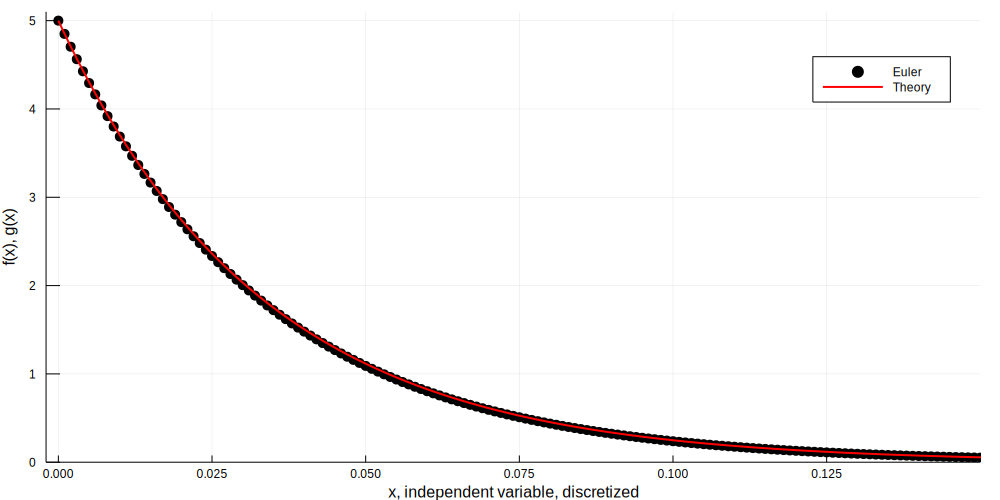

In [45]:
gr(size=(1000,500))                           # Create a new figure, with desired size

# Plot in the current figure, f(x) - the mumerical solution
plot(x, f, label="Euler", color=:black, linewidth=0, markershape =:circle, markersize=5)

# Plot in the current figure, g(x) - the analytical solution
plot!(x, g, label="Theory", color=:red, linewidth=2)

# Set the horizontal limits
xlims!(-0.002,0.15)

# Set the vertical limits
ylims!(0,5.1)

# Label of the horizontal axis
xlabel!("x, independent variable, discretized")

# Label of the vertical axis
ylabel!("f(x), g(x)")